# Region and The World Color Survey: Final Project

COG 260: Data, Computation, and The Mind (Yang Xu)

Data source: http://www1.icsi.berkeley.edu/wcs/data.html

______________________________________________

Import helper function file for WCS data analysis.

In [64]:
from wcs_helper_functions import *

Import relevant Python libraries.

In [65]:
import numpy as np
from scipy import stats
from random import random
import pandas as pd
%matplotlib inline



`munsellInfo` is a 2-element tuple with dictionary elements.

In [66]:
munsellInfo = readChipData('./WCS_data_core/chip.txt')


`namingData` is a hierarchical dictionary organized as follows:

**language _(1 - 110)_ &rarr; speaker _(1 - *range varies per language*)_ &rarr; chip index _(1 - 330)_ &rarr; color term**

In [118]:
namingData = readNamingData('./WCS_data_core/term.txt')

25

In [131]:
fociData = readFociData('./WCS_data_core/foci-exp.txt')
fociData


{1: {1: {'LF': ['A:0'],
   'WK': ['D:9', 'D:10', 'D:11', 'D:12'],
   'F': ['D:25'],
   'LB': ['J:0'],
   'G': ['F:17'],
   'LE': ['F:1', 'F:2', 'F:3', 'G:1', 'G:2', 'G:3']},
  2: {'LF': ['A:0'],
   'S': ['C:1', 'C:2', 'C:3', 'C:4', 'C:5'],
   'WK': ['E:1'],
   'LE': ['G:1', 'G:2'],
   'LB': ['J:0'],
   'G': ['I:29', 'I:30']},
  3: {'LF': ['A:0'],
   'LE': ['F:1', 'F:2', 'F:3'],
   'WK': ['E:3'],
   'S': ['D:12', 'I:5'],
   'F': ['B:20', 'B:21', 'B:22', 'B:23'],
   'LB': ['J:0']},
  4: {'LF': ['A:0'],
   'F': ['B:5'],
   'WK': ['E:5'],
   'LE': ['G:2'],
   'LB': ['J:0']},
  5: {'LF': ['A:0'],
   'WK': ['C:10'],
   'F': ['C:13'],
   'GB': ['D:13'],
   'LE': ['G:2'],
   'LB': ['G:27']},
  6: {'LF': ['A:0'],
   'WK': ['D:2', 'D:3', 'D:4', 'D:5'],
   'LE': ['G:1', 'G:2'],
   'LB': ['J:0'],
   'G': ['F:27', 'F:28'],
   'F': ['C:37', 'C:38', 'C:39']},
  7: {'LF': ['A:0'],
   'F': ['C:11'],
   'WK': ['B:12'],
   'G': ['F:29'],
   'LB': ['J:0'],
   'S': ['H:17'],
   'LE': ['I:1']},
  8: {'LF': 

In [69]:
# Helper fucntion for extracting the language and the region
def readlanguageData(namingDataFilePath):
    namingData = {}  # empty dict
    fileHandler = open(namingDataFilePath,'r')

    for line in fileHandler:              			# for each line in the file
        lineElements = line.split()     			# lineElements are denoted by white space
        
    

        languageNumber = int(lineElements[0])    	
        languageName = str(lineElements[1])  		
        country = str(lineElements[2])   

        if not (languageNumber in namingData.keys()):    						# if this language isn't a key in the namingData dict
            namingData[languageNumber] = {}

        namingData[languageNumber][languageName] =  country

    fileHandler.close()				# close file after reading it in, for neatness
    return namingData

languageData = readlanguageData('./WCS_data_core/language.txt')

In [70]:
def readcountryData(namingDataFilePath):
    namingData = {}  # empty dict
    fileHandler = open(namingDataFilePath,'r')

    for line in fileHandler:              			# for each line in the file
        lineElements = line.split(",")     			# lineElements are denoted by white space  

        if lineElements[1] != "":
            Lat = float(lineElements[1])    	
            CountryName = str(lineElements[3]).strip()  

            if not (CountryName in namingData.keys()):    						# if this language isn't a key in the namingData dict
                namingData[CountryName] = {}

            namingData[CountryName] =  Lat

    fileHandler.close()				# close file after reading it in, for neatness
    return namingData

countryData = readcountryData('./WCS_data_core/countries.txt')
countryData["Papua"]

-6.314993

Scatterplot of Mean Number of Color Terms per Chip per Language vs Latitude

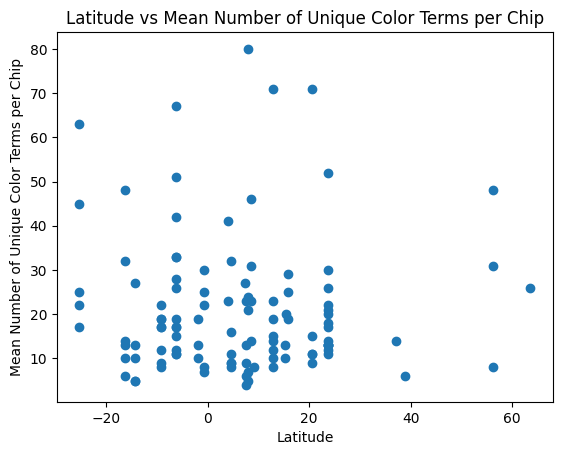

In [78]:
mean_color_terms_per_chip = {}
for language in namingData:
    total_terms = []
    for speaker in namingData[language]:
        for chip in namingData[language][speaker]:
            total_terms.append(namingData[language][speaker][chip])
    unique_terms = set(total_terms)
    mean_color_terms_per_chip[language] = len(unique_terms)  

latitudes = []
mean_terms = []
for language, terms in mean_color_terms_per_chip.items():
    if language in languageData:
        region = list(languageData[language].values())[0]
        if region in countryData:
            latitude = countryData[region]
            latitudes.append(latitude)
            mean_terms.append(terms)
            
plt.scatter(latitudes, mean_terms)
plt.xlabel('Latitude')
plt.ylabel('Mean Number of Unique Color Terms per Chip')
plt.title('Latitude vs Mean Number of Unique Color Terms per Chip')
plt.show()



In [72]:
language_latitudes = {}
for language, data in languageData.items():
    region = list(data.values())[0]
    if region in countryData:
        latitude = countryData[region]
        language_latitudes[language] = abs(latitude)  # Store the absolute latitude

sorted_languages = sorted(language_latitudes, key=language_latitudes.get)
# get closest 10% and furthest 10%
languages_closest_to_equator = sorted_languages[:11]  
languages_furthest_from_equator = sorted_languages[-11:]  

closest_languages_names = {language: list(languageData[language].keys())[0] for language in languages_closest_to_equator}
furthest_languages_names = {language: list(languageData[language].keys())[0] for language in languages_furthest_from_equator}

closest_languages_names, furthest_languages_names

({12: 'Bauzi',
  13: 'Berik',
  54: 'Kemtuik',
  60: 'Kwerba',
  90: 'Tabla',
  22: 'Cayapa',
  29: 'Cofan',
  102: 'Waorani',
  34: 'Djuka',
  84: 'Saramaccan',
  19: 'Camsa'},
 {57: 'Kriol',
  58: 'Kuku-Yalanji',
  64: 'Martu_Wangka',
  76: 'Murinbata',
  103: 'Walpiri',
  71: 'Mikasuki',
  30: 'Colorado',
  31: 'Eastern_Cree',
  70: 'Micmac',
  88: 'Slave',
  109: 'Yupik'})

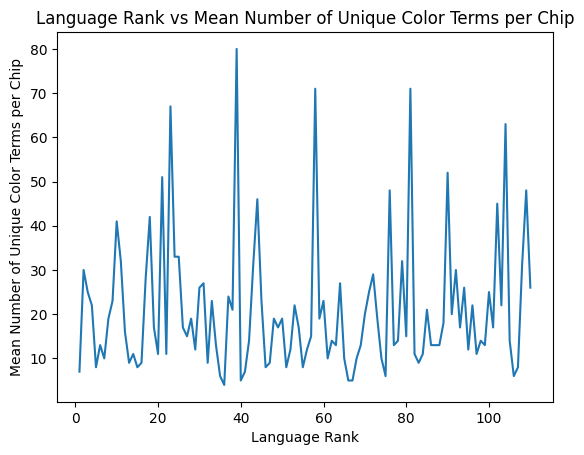

In [112]:
ranked_languages = {language: mean_color_terms_per_chip[language] for language in sorted_languages} 
ranked_languages = np.array(list(ranked_languages.values())) 
x = [i for i in range(1, 111)]

plt.plot(x, ranked_languages)
plt.xlabel('Language Rank')
plt.ylabel('Mean Number of Unique Color Terms per Chip')
plt.title('Language Rank vs Mean Number of Unique Color Terms per Chip')
plt.show()


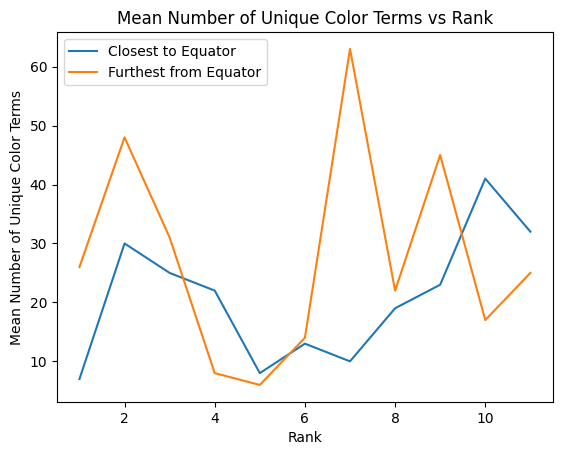

In [113]:
# gets the closest_languages_names with their latitude
closest_languages = {language: language_latitudes[language] for language in languages_closest_to_equator} 
furthest_languages = {language: language_latitudes[language] for language in languages_furthest_from_equator}

#put them is an array
closest_languages = np.array(list(closest_languages.items()))
furthest_languages = np.array(list(furthest_languages.items()))

# gets the closest_languages_names witht their mean terms
closest_mean_terms = {language: mean_color_terms_per_chip[language] for language in languages_closest_to_equator}
furthest_mean_terms = {language: mean_color_terms_per_chip[language] for language in languages_furthest_from_equator}

#put them is an list
closest_mean_terms = np.array(list(closest_mean_terms.values())) 
furthest_mean_terms = np.array(list(furthest_mean_terms.values()))
furthest_mean_terms = furthest_mean_terms[::-1]

x = [i for i in range(1, 12)]

#plot the grapth

plt.plot(x, closest_mean_terms, label='Closest to Equator')
plt.plot(x, furthest_mean_terms, label='Furthest from Equator')
plt.xlabel('Rank')
plt.ylabel('Mean Number of Unique Color Terms')
plt.title('Mean Number of Unique Color Terms vs Rank')
plt.legend()
plt.show()

# this is the 11 highest ranked languages in proximity to the equator compared to the 11 lowest ranked languages in proximity to the equator
# where rank 111 language is compared to rank 1 language, rank 110 language is compared to rank 2 language and so on




# Blue and Green

In [173]:
# here we want to look at the foci data and get all the eperimental data for each language that is Blue/Green (colour chip  15 -30)
bg_chip_coordintes = {}
for language in fociData:
    total_terms = np.array([])
    # length = len (fociData[language])
    for speaker in fociData[language]:
        for chip in fociData[language][speaker]:
            for i in range(len(fociData[language][speaker][chip])):
                colour = int(fociData[language][speaker][chip][i].split(':')[1])
                if colour >= 15 and colour <= 30:
                    total_terms = np.append(total_terms, fociData[language][speaker][chip][i])
    unique_terms = set(total_terms)
    bg_chip_coordintes[language] = len(unique_terms) 
bg_chip_coordintes
    


{1: 34,
 2: 68,
 3: 45,
 4: 83,
 5: 25,
 6: 74,
 7: 59,
 8: 38,
 9: 35,
 10: 92,
 11: 33,
 12: 40,
 13: 66,
 14: 15,
 15: 17,
 16: 24,
 17: 124,
 18: 112,
 19: 29,
 20: 20,
 21: 17,
 22: 40,
 23: 26,
 24: 27,
 25: 7,
 26: 23,
 27: 39,
 28: 29,
 29: 15,
 30: 27,
 31: 14,
 32: 128,
 33: 4,
 34: 39,
 35: 25,
 36: 0,
 37: 12,
 38: 38,
 39: 44,
 40: 29,
 41: 49,
 42: 36,
 43: 47,
 44: 25,
 45: 23,
 46: 23,
 47: 20,
 48: 23,
 49: 20,
 50: 72,
 51: 117,
 52: 80,
 53: 56,
 54: 55,
 55: 26,
 56: 17,
 57: 68,
 58: 35,
 59: 35,
 60: 20,
 61: 8,
 62: 34,
 63: 117,
 64: 51,
 65: 22,
 66: 112,
 67: 69,
 68: 30,
 69: 30,
 70: 31,
 71: 26,
 72: 45,
 73: 16,
 74: 16,
 75: 27,
 76: 26,
 77: 1,
 78: 10,
 79: 26,
 80: 59,
 81: 27,
 82: 33,
 83: 33,
 84: 46,
 85: 15,
 86: 31,
 87: 43,
 88: 30,
 89: 28,
 90: 25,
 91: 13,
 92: 15,
 93: 10,
 94: 26,
 95: 80,
 96: 32,
 97: 18,
 98: 79,
 99: 23,
 100: 24,
 101: 25,
 102: 63,
 103: 59,
 104: 2,
 105: 0,
 106: 25,
 107: 52,
 108: 18,
 109: 55,
 110: 31}

In [174]:
average_bg_chip_coordintes = {}
for language in bg_chip_coordintes:
    average_bg_chip_coordintes[language] = bg_chip_coordintes[language] / mean_color_terms_per_chip[language]
average_bg_chip_coordintes

{1: 3.7777777777777777,
 2: 2.4285714285714284,
 3: 0.6338028169014085,
 4: 3.32,
 5: 2.7777777777777777,
 6: 1.7619047619047619,
 7: 2.8095238095238093,
 8: 2.235294117647059,
 9: 2.6923076923076925,
 10: 4.842105263157895,
 11: 3.0,
 12: 5.714285714285714,
 13: 2.2,
 14: 0.6521739130434783,
 15: 1.1333333333333333,
 16: 1.7142857142857142,
 17: 4.275862068965517,
 18: 6.588235294117647,
 19: 0.90625,
 20: 1.0526315789473684,
 21: 1.7,
 22: 3.076923076923077,
 23: 4.333333333333333,
 24: 1.4210526315789473,
 25: 0.875,
 26: 1.7692307692307692,
 27: 0.8125,
 28: 1.2083333333333333,
 29: 1.5,
 30: 4.5,
 31: 1.75,
 32: 4.7407407407407405,
 33: 0.5,
 34: 1.6956521739130435,
 35: 1.9230769230769231,
 36: 0.0,
 37: 0.9230769230769231,
 38: 2.0,
 39: 2.75,
 40: 3.2222222222222223,
 41: 3.769230769230769,
 42: 1.1612903225806452,
 43: 1.7407407407407407,
 44: 0.352112676056338,
 45: 1.7692307692307692,
 46: 1.2777777777777777,
 47: 0.39215686274509803,
 48: 1.0,
 49: 1.8181818181818181,
 50: 

In [171]:
bg_chip_terms = {}
for language in fociData:
    total_terms = np.array([])
    # length = len (fociData[language])
    for speaker in fociData[language]:
        for chip in fociData[language][speaker]:
            for i in range(len(fociData[language][speaker][chip])):
                colour = int(fociData[language][speaker][chip][i].split(':')[1])
                if colour >= 15 and colour <= 30:
                    dictionary = fociData[language][speaker]
                    value = fociData[language][speaker][chip]
                    for  key in dictionary.keys():
                        if value == dictionary[key]:
                            total_terms = np.append(total_terms, key)
    unique_terms = set(total_terms)
    bg_chip_terms[language] = len(unique_terms) 
bg_chip_terms
    

{1: 6,
 2: 10,
 3: 5,
 4: 9,
 5: 3,
 6: 15,
 7: 8,
 8: 6,
 9: 4,
 10: 9,
 11: 5,
 12: 2,
 13: 12,
 14: 6,
 15: 3,
 16: 2,
 17: 8,
 18: 6,
 19: 3,
 20: 3,
 21: 2,
 22: 3,
 23: 4,
 24: 5,
 25: 1,
 26: 5,
 27: 12,
 28: 6,
 29: 2,
 30: 2,
 31: 3,
 32: 10,
 33: 1,
 34: 5,
 35: 6,
 36: 0,
 37: 3,
 38: 4,
 39: 9,
 40: 4,
 41: 4,
 42: 10,
 43: 9,
 44: 4,
 45: 2,
 46: 3,
 47: 2,
 48: 6,
 49: 3,
 50: 3,
 51: 15,
 52: 9,
 53: 1,
 54: 12,
 55: 5,
 56: 5,
 57: 5,
 58: 4,
 59: 7,
 60: 12,
 61: 3,
 62: 9,
 63: 15,
 64: 12,
 65: 3,
 66: 6,
 67: 15,
 68: 4,
 69: 8,
 70: 2,
 71: 4,
 72: 6,
 73: 6,
 74: 1,
 75: 6,
 76: 12,
 77: 1,
 78: 2,
 79: 3,
 80: 4,
 81: 4,
 82: 9,
 83: 8,
 84: 10,
 85: 1,
 86: 5,
 87: 5,
 88: 7,
 89: 3,
 90: 2,
 91: 4,
 92: 3,
 93: 2,
 94: 4,
 95: 8,
 96: 3,
 97: 5,
 98: 4,
 99: 6,
 100: 3,
 101: 4,
 102: 9,
 103: 23,
 104: 2,
 105: 0,
 106: 4,
 107: 5,
 108: 2,
 109: 7,
 110: 3}

In [73]:
# Create an empty list to store the summary data
summary_data = []

# Iterate through each language in languageData
for language_id, language_info in languageData.items():
    language_name = list(language_info.keys())[0]
    region = language_info[language_name]
    latitude = countryData.get(region, None)

    if latitude is not None:
        distance_to_equator = abs(latitude)
    else:
        distance_to_equator = 'Unknown'

    summary_data.append({
        'Language ID': language_id,
        'Language Name': language_name,
        'Region': region,
        'Distance to Equator': distance_to_equator
    })

# Create a DataFrame from the summary data
summary_data_frame = pd.DataFrame(summary_data)

# Display the table
print(summary_data_frame)

     Language ID Language Name       Region  Distance to Equator
0              1        Abidji        Ivory             7.539989
1              2       Agarabi        Papua             6.314993
2              3     Casiguran  Philippines            12.879721
3              4    Aguacateco    Guatemala            15.783471
4              5    Amarakaeri         Peru             9.189967
..           ...           ...          ...                  ...
105          106         Yakan  Philippines            12.879721
106          107     Yaminahua         Peru             9.189967
107          108        Yucuna     Colombia             4.570868
108          109         Yupik       Alaska            63.588800
109          110      Zapoteco       Mexico            23.634501

[110 rows x 4 columns]
